**Import the libraries**

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

**Data Collection & Processing**

In [5]:
#loading csv data to Pandas Dataframe
gold_data = pd.read_csv('gld_price_data.csv')

In [6]:
#print first 5 rows in dataframe
gold_data.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [7]:
#print last 5 rows
gold_data.tail()

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [9]:
#number of rows and columns
gold_data.shape

(2290, 6)

In [11]:
#fetching basic info
gold_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


**Correlation**
*1.Positive Correlation*
*2.Negative Correlation*

In [12]:
correlation = gold_data.corr()

C:\Users\saimt\AppData\Local\Temp\ipykernel_10296\1828644926.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = gold_data.corr()


<AxesSubplot: >

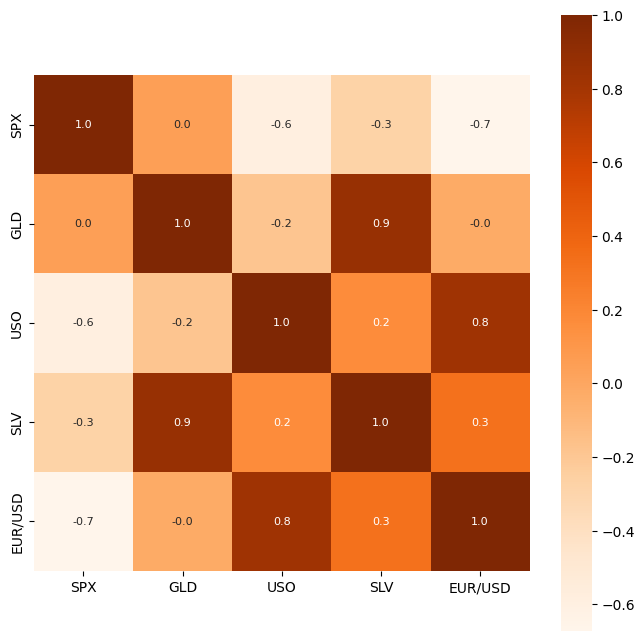

In [16]:
#Constructing heat map to understand correlation
plt.figure(figsize = (8,8))
sns.heatmap(correlation , cbar=True, square=True, fmt = '.1f', annot=True, annot_kws={'size':8}, cmap='Oranges')

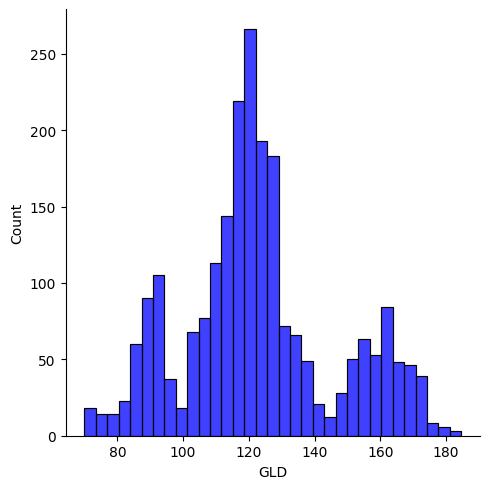

In [19]:
#Checking distribution of gold values
sns.displot(gold_data['GLD'] , color='blue')

**Splitting Features and Target**

In [20]:
#Predicting gold by feeding all other features and removing date column
X=gold_data.drop(['Date' , 'GLD'] , axis=1)
# axis =1 for dropping column and axis =0 for dropping row
Y = gold_data['GLD']

In [21]:
print(X)

              SPX        USO      SLV   EUR/USD
0     1447.160034  78.470001  15.1800  1.471692
1     1447.160034  78.370003  15.2850  1.474491
2     1411.630005  77.309998  15.1670  1.475492
3     1416.180054  75.500000  15.0530  1.468299
4     1390.189941  76.059998  15.5900  1.557099
...           ...        ...      ...       ...
2285  2671.919922  14.060000  15.5100  1.186789
2286  2697.790039  14.370000  15.5300  1.184722
2287  2723.070068  14.410000  15.7400  1.191753
2288  2730.129883  14.380000  15.5600  1.193118
2289  2725.780029  14.405800  15.4542  1.182033

[2290 rows x 4 columns]


In [23]:
print(Y)

0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64


**Splitting into Training and Test Data**

In [25]:
X_train, X_test, Y_train, Y_test = train_test_split(X , Y , test_size= 0.2, random_state=2)


**Model Training using RF Regressor**

In [26]:
regressor = RandomForestRegressor(n_estimators=100)
regressor.fit(X_train, Y_train)


RandomForestRegressor()

**Model Evaluation**

In [29]:
#prediction on Test Data
test_data_prediction = regressor.predict(X_test)
print(test_data_prediction)

[168.4994995   81.96359973 115.79130016 127.52580067 120.57140129
 154.51489774 150.34119837 126.04700046 117.65389873 126.06450057
 116.74600088 172.49220138 141.1254987  167.54629791 115.31360032
 117.96460037 137.34290347 169.80300028 159.67830231 158.9890998
 154.85829992 125.42039999 176.18829947 156.83830338 125.22220022
  94.00660002  77.40070003 120.62760007 119.18439938 167.44849945
  88.18640066 125.19459973  90.99500077 117.69910036 121.14449934
 136.89350148 115.45170115 115.14470104 147.75349943 107.19920068
 104.30310228  87.15309788 126.60010067 117.5969003  154.72299885
 119.50530029 108.28740004 107.92469793  93.14420068 127.14909748
  75.30050025 113.61209898 121.35880018 111.24119902 118.93189874
 120.20279964 158.8724001  167.55490142 147.08959652  85.78049861
  94.32200055  86.8294989   90.69450041 118.94030068 126.42660086
 127.4362003  170.13009947 122.18019945 117.36969863  98.86410057
 168.57080112 142.87609823 131.87480233 121.1279022  120.80239937
 119.770400

In [30]:
#R squared error->tells how good the model fits or observes the data
error_score = metrics.r2_score(Y_test, test_data_prediction)
print("R squared error : " , error_score)

R squared error :  0.9894646283608163


**Visualizing by Actual vs Predicted**

In [31]:
Y_test = list(Y_test)

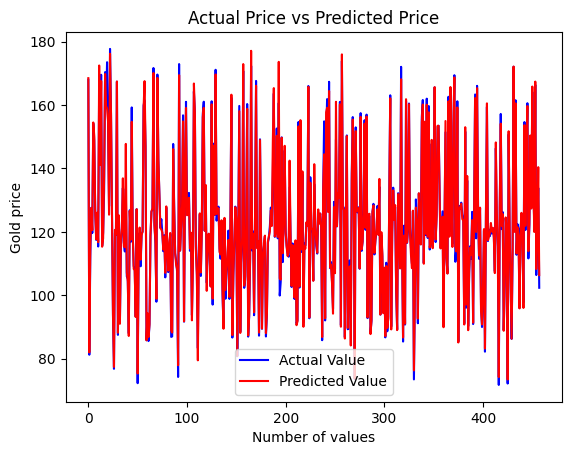

In [32]:
plt.plot(Y_test, color='blue' , label='Actual Value')
plt.plot(test_data_prediction, color='red' , label='Predicted Value')
plt.title('Actual Price vs Predicted Price')
plt.xlabel('Number of values')
plt.ylabel('Gold price')
plt.legend()
plt.show()